# Convlution Neural Networks (CNN) for 2-D signals for a problem of your choice

### Problem Statement
Given a dataset of handwritten digits (0-9), the task is to build a model that can accurately classify the digits based on their images.

### Dataset
MNIST Dataset which contains 28 * 28 grayscale images of handwritten digits and each digit is labelled with corresponding digit (0-9).


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


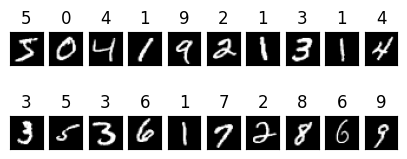

In [3]:
fig = plt.figure(figsize = (5,2))
for i in range(20):
  ax = fig.add_subplot(2,10, i+1, xticks = [], yticks=[])
  ax.imshow(np.squeeze(x_train[i]), cmap = 'gray')
  ax.set_title(y_train[i])

In [4]:
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28)


In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
# Reshape the input data to fit the CNN input shape
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
#  Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
# Define the CNN architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, verbose=1)


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                        

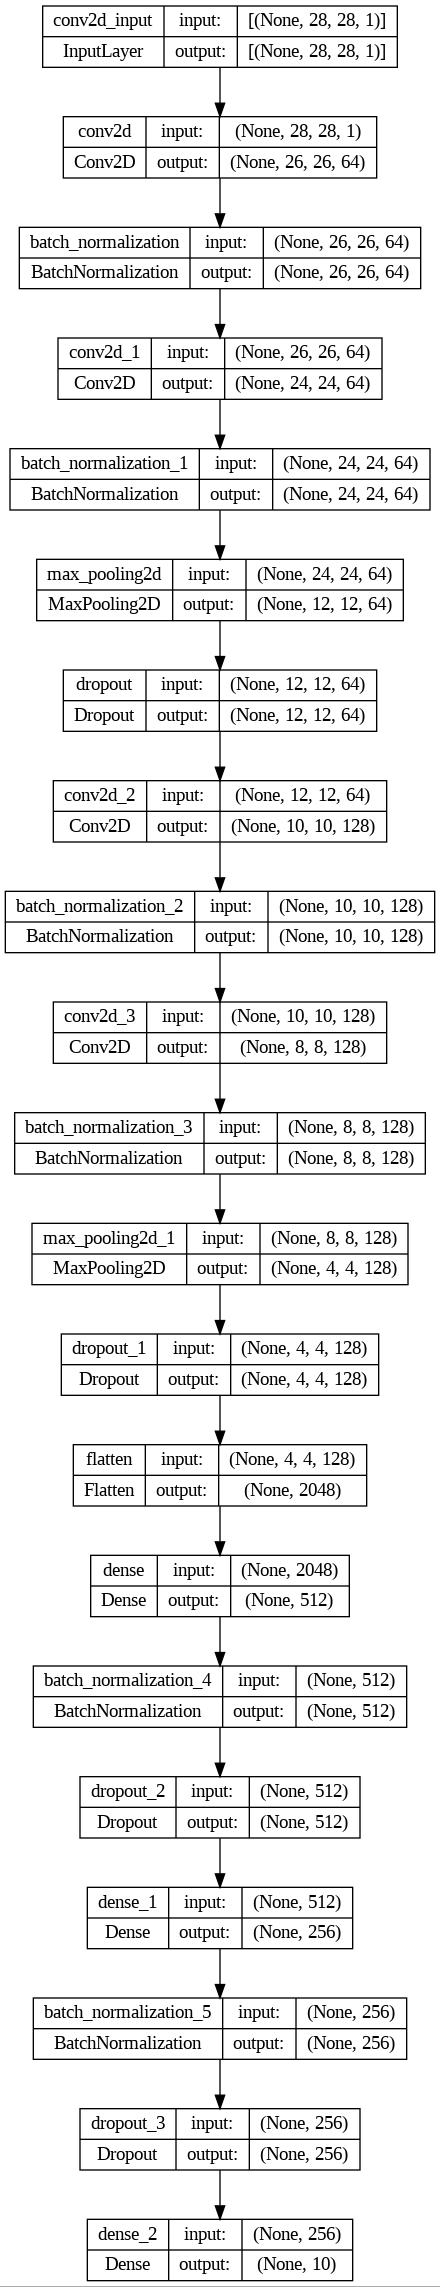

In [10]:
plot_model(model, 'model.jpg', show_shapes = True)

In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.1, callbacks = [reduce_lr, early_stop, checkpoint])

# Load best model
best_model = tf.keras.models.load_model('best_model.keras')

Epoch 1/50
422/422 [==============================] - ETA: 0s - loss: 0.2143 - accuracy: 0.9346
Epoch 1: val_loss improved from inf to 4.15270, saving model to best_model.keras
422/422 [==============================] - 20s 24ms/step - loss: 0.2143 - accuracy: 0.9346 - val_loss: 4.1527 - val_accuracy: 0.2745 - lr: 0.0010
Epoch 2/50
420/422 [============================>.] - ETA: 0s - loss: 0.0701 - accuracy: 0.9785
Epoch 2: val_loss improved from 4.15270 to 0.03226, saving model to best_model.keras
422/422 [==============================] - 9s 22ms/step - loss: 0.0701 - accuracy: 0.9785 - val_loss: 0.0323 - val_accuracy: 0.9905 - lr: 0.0010
Epoch 3/50
421/422 [============================>.] - ETA: 0s - loss: 0.0493 - accuracy: 0.9849
Epoch 3: val_loss improved from 0.03226 to 0.03017, saving model to best_model.keras
422/422 [==============================] - 9s 22ms/step - loss: 0.0492 - accuracy: 0.9849 - val_loss: 0.0302 - val_accuracy: 0.9908 - lr: 0.0010
Epoch 4/50
421/422 [=====

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 4ms/step - loss: 0.0146 - accuracy: 0.9960


In [14]:
test_best_loss, test_best_acc = best_model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.0146 - accuracy: 0.9960


In [15]:
print('Test accuracy:', test_acc)


Test accuracy: 0.9959999918937683


In [16]:
print('Best Test Accuracy: ', test_best_acc)

Best Test Accuracy:  0.9959999918937683


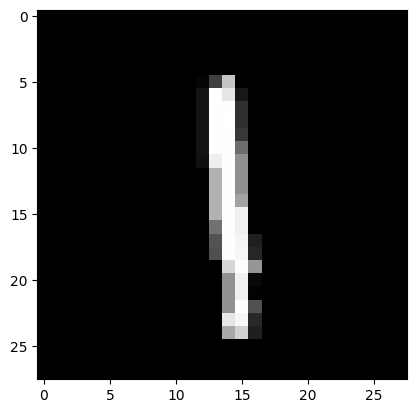

In [17]:
test_image = x_train[8]
plt.imshow(np.squeeze(test_image), cmap = 'gray')
plt.show()

In [18]:
test_image = test_image.reshape(-1, 28, 28, 1)
# x_train = x_train.reshape(-1, 28, 28, 1)

p = model.predict(test_image)
print('Predicted: {}'.format(np.argmax(p)))

1/1 [==============================] - 0s 356ms/step
Predicted: 1
